<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/notebooks/SKY130_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKY130 V<sub>GS</sub> sweep

# Set up dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
%%writefile environment.yml
channels:
  - litex-hub
dependencies:
  - open_pdks.sky130a
  - ngspice

Writing environment.yml


In [3]:
!mamba env update -n base -f environment.yml

Streaming output truncated to the last 5000 lines.
Extracting   (1)  ⣾  [+] 6m:12.3s
Extracting   (1)  ⣾  [+] 6m:12.4s
Extracting   (1)  ⣾  [+] 6m:12.5s
Extracting   (1)  ⣾  [+] 6m:12.6s
Extracting   (1)  ⣾  [+] 6m:12.7s
Extracting   (1)  ⣾  [+] 6m:12.8s
Extracting   (1)  ⣾  [+] 6m:12.9s
Extracting   (1)  ⣾  [+] 6m:13.0s
Extracting   (1)  ⣾  [+] 6m:13.1s
Extracting   (1)  ⣾  [+] 6m:13.2s
Extracting   (1)  ⣾  [+] 6m:13.3s
Extracting   (1)  ⣾  [+] 6m:13.4s
Extracting   (1)  ⣾  [+] 6m:13.5s
Extracting   (1)  ⣾  [+] 6m:13.6s
Extracting   (1)  ⣾  [+] 6m:13.7s
Extracting   (1)  ⣾  [+] 6m:13.8s
Extracting   (1)  ⣾  [+] 6m:13.9s
Extracting   (1)  ⣾  [+] 6m:14.0s
Extracting   (1)  ⣾  [+] 6m:14.1s
Extracting   (1)  ⣾  [+] 6m:14.2s
Extracting   (1)  ⣾  [+] 6m:14.3s
Extracting   (1)  ⣾  [+] 6m:14.4s
Extracting   (1)  ⣾  [+] 6m:14.5s
Extracting   (1)  ⣾  [+] 6m:14.6s
Extracting   (1)  ⣾  [+] 6m:14.7s
Extracting   (1)  ⣾  [+] 6m:14.8s
Extracting   (1)  ⣾  [+] 6m:14.9s
Extracting   (1)  ⣾  [+] 6m:15.

# Simulation

In [4]:
%%writefile .spiceinit
* ngspice initialization for sky130
* assert BSIM compatibility mode with "nf" vs. "W"
set ngbehavior=hsa
* "nomodcheck" speeds up loading time
set ng_nomodcheck

Overwriting .spiceinit


In [114]:
%%writefile netlist.spice
* PMOS VGS sweep for LVT, SVT and HVT device
.lib "/usr/local/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice" tt
XML vdp vgp 0 vbp sky130_fd_pr__pfet_01v8_lvt L=0.35 W=4 nf=1 mult=1 m=1
+ ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0

XMS vdp vgp 0 vbp sky130_fd_pr__pfet_01v8 L=0.15 W=2 nf=1 mult=1 m=1
+ ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0

XMH vdp vgp 0 vbp sky130_fd_pr__pfet_01v8_hvt L=0.15 W=2 nf=1 mult=1 m=1
+ ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0

vsdp     0  vdp        dc 0.9
vsgp     0  vgp        dc 0
vsbp     0  vbp        dc 0
.end

.control
set wr_singlescale
save all
+ @m.XML.msky130_fd_pr__pfet_01v8_lvt[id] @m.XML.msky130_fd_pr__pfet_01v8_lvt[gm]
+ @m.XMS.msky130_fd_pr__pfet_01v8[id]    @m.XMS.msky130_fd_pr__pfet_01v8[gm]
+ @m.XMH.msky130_fd_pr__pfet_01v8_hvt[id] @m.XMH.msky130_fd_pr__pfet_01v8_hvt[gm]
op
show
showmod m.XML.msky130_fd_pr__pfet_01v8_lvt
+ m.XMS.msky130_fd_pr__pfet_01v8
+ m.XMH.msky130_fd_pr__pfet_01v8_hvt
dc vsgp -0.5 1.8 0.01
wrdata output.txt
+ @m.XML.msky130_fd_pr__pfet_01v8_lvt[gm] @m.XML.msky130_fd_pr__pfet_01v8_lvt[id]
+ @m.XMS.msky130_fd_pr__pfet_01v8[gm]     @m.XMS.msky130_fd_pr__pfet_01v8[id]
+ @m.XMH.msky130_fd_pr__pfet_01v8_hvt[gm] @m.XMH.msky130_fd_pr__pfet_01v8_hvt[id]
.endc

Overwriting netlist.spice


In [115]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs a



Circuit: * pmos vgs sweep for lvt, svt and hvt device

option SCALE: Scale is set to 1e-06 for instance and model parameters
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

 Reference value :  0.00000e+00
No. of Data Rows : 1
 BSIM4v5: Berkeley Short Channel IGFET Model-4
     device m.xmh.msky130_fd_pr__ m.xms.msky130_fd_pr__ m.xml.msky130_fd_pr__
      model xmh:sky130_fd_pr__pfe xms:sky130_fd_pr__pfe xml:sky130_fd_pr__pfe
          l               1.5e-07               1.5e-07               3.5e-07
          w                 2e-06                 2e-06                 4e-06
          m                     1                     1                     1
         nf                     1                     1                     1
         sa                     0                     0                     0
         sb                     0                     0                     0
         sd                     0                

In [116]:
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vsg", "gm_L", "id_L", "gm_S", "id_S", "gm_H", "id_H"]
df['gm_id_L'] = df.gm_L/df.id_L
df['gm_id_S'] = df.gm_S/df.id_S
df['gm_id_H'] = df.gm_H/df.id_H
df

,vsg,gm_L,id_L,gm_S,id_S,gm_H,id_H,gm_id_L,gm_id_S,gm_id_H
0,-0.50,3.148432e-13,1.216630e-14,2.586685e-15,9.725858e-17,1.694199e-19,5.928473e-21,25.878311,26.595953,28.577327
1,-0.49,4.078280e-13,1.575962e-14,3.374672e-15,1.268910e-16,2.254624e-19,7.889557e-21,25.878027,26.595049,28.577325
2,-0.48,5.282722e-13,2.041418e-14,4.402641e-15,1.655501e-16,3.000433e-19,1.049935e-20,25.877704,26.594015,28.577323
3,-0.47,6.842838e-13,2.644336e-14,5.743649e-15,2.159848e-16,3.992947e-19,1.397243e-20,25.877336,26.592835,28.577321
4,-0.46,8.863641e-13,3.425308e-14,7.492974e-15,2.817809e-16,5.313776e-19,1.859438e-20,25.876917,26.591487,28.577318
...,...,...,...,...,...,...,...,...,...,...
226,1.76,4.983732e-04,5.666201e-04,3.828918e-04,3.009412e-04,3.725893e-04,2.340409e-04,0.879555,1.272314,1.591984
227,1.77,4.931786e-04,5.715775e-04,3.812079e-04,3.047614e-04,3.725288e-04,2.377662e-04,0.862838,1.250841,1.566786
228,1.78,4.878716e-04,5.764825e-04,3.794326e-04,3.085643e-04,3.723925e-04,2.414906e-04,0.846290,1.229671,1.542058
229,1.79,4.824559e-04,5.813338e-04,3.775670e-04,3.123490e-04,3.721811e-04,2.452132e-04,0.829912,1.208799,1.517786


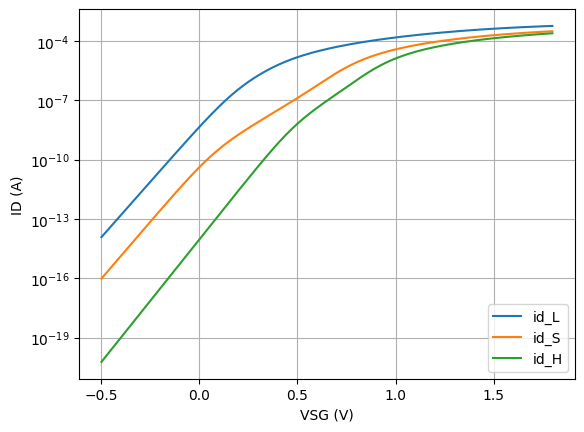

In [117]:
plt.semilogy(df.vsg, df.id_L, label="id_L")
plt.semilogy(df.vsg, df.id_S, label="id_S")
plt.semilogy(df.vsg, df.id_H, label="id_H")
plt.xlabel("VSG (V)")
plt.ylabel("ID (A)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

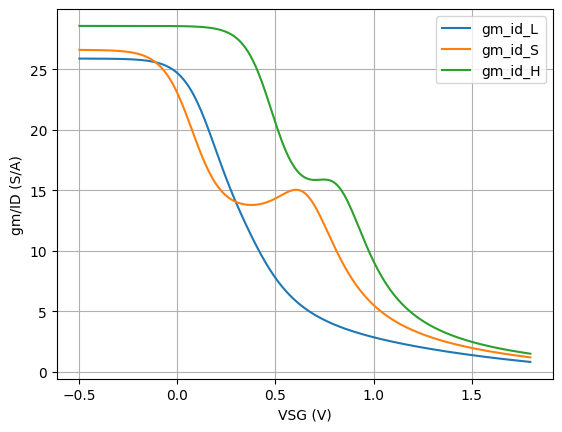

In [118]:
plt.plot(df.vsg, df.gm_id_L, label="gm_id_L")
plt.plot(df.vsg, df.gm_id_S, label="gm_id_S")
plt.plot(df.vsg, df.gm_id_H, label="gm_id_H")
plt.xlabel("VSG (V)")
plt.ylabel("gm/ID (S/A)")
plt.legend(loc="upper right")
plt.grid()
plt.show()

The above plot shows a problem with the standard and high VT PMOS models in the SKY130 PDK. These models should not be used for design in weak/moderate inversion.